In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import json 
import os 

In [3]:
from Scripts import EDA_functions as mt_eda

## Quick import of message df  

parsing with mt_eda, just use csv and reformat to the point in the df

In [4]:
data_path = "Data/data.json"
with open(data_path, "rb") as inp: 
    data = json.load(inp)
data.keys()

dict_keys(['Messages', 'Photos', 'Places', 'Purchases', 'Spotify', 'Usage', 'User'])

In [6]:
list_of_dfs = [mt_eda.get_msg_df(msg_dict) for msg_dict in data["Messages"]]
all_msg_df = pd.concat(list_of_dfs, axis=0)

In [8]:
all_msg_df['time_since_last_msg'].head()

match_id   msg_number
Match 169  0                 NaT
Match 168  0                 NaT
           1            00:00:18
           2            00:00:35
           3            00:08:19
Name: time_since_last_msg, dtype: timedelta64[ns]

In [17]:
time_since_lst_msg = all_msg_df['time_since_last_msg'][~all_msg_df['time_since_last_msg'].isin([pd.NaT])]

In [18]:
time_since_lst_msg.describe()

count                        796
mean      3 days 03:17:56.028894
std      16 days 07:30:45.889065
min              0 days 00:00:01
25%              0 days 00:01:37
50%              0 days 00:17:23
75%       0 days 11:26:52.750000
max            228 days 13:06:03
Name: time_since_last_msg, dtype: object

In [30]:
time_since_lst_msg.quantile(np.linspace(0.1,1,10))

0.1          0 days 00:00:18
0.2          0 days 00:00:53
0.3          0 days 00:02:57
0.4          0 days 00:07:11
0.5          0 days 00:17:23
0.6          0 days 01:11:52
0.7          0 days 05:56:04
0.8          0 days 21:18:45
0.9   3 days 00:15:36.500000
1.0        228 days 13:06:03
Name: time_since_last_msg, dtype: timedelta64[ns]

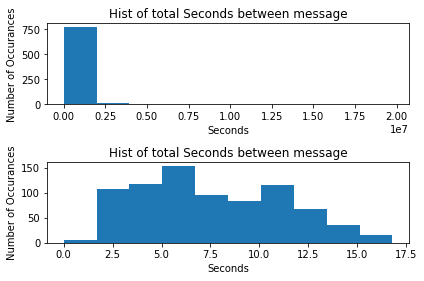

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.hist(time_since_lst_msg.dt.total_seconds())
ax1.set_title("Hist of total Seconds between message")
ax1.set_xlabel("Seconds")
ax1.set_ylabel("Number of Occurances")

ax2 =fig.add_subplot(2,1,2)
ax2.hist(np.log(time_since_lst_msg.dt.total_seconds()))
ax2.set_title("Hist of total Seconds between message")
ax2.set_xlabel("Seconds")
ax2.set_ylabel("Number of Occurances")

fig.tight_layout()

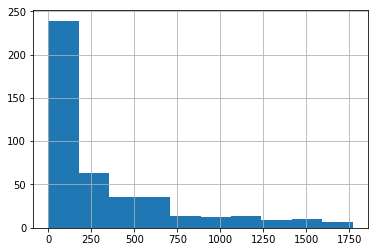

In [52]:
sent_quickly = time_since_lst_msg[time_since_lst_msg.dt.total_seconds() < 1800] # keep message sent with two hours of each other 
sent_quickly.dt.total_seconds().hist()

In [50]:
sent_quickly.shape

(410,)